In [1]:
%matplotlib inline
#k-means

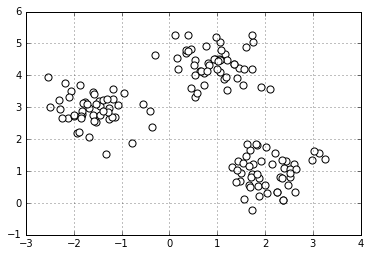

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='white',marker='o',s=50)
plt.grid()
plt.show()

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
           init = 'random', #Esto no es muy bueno
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

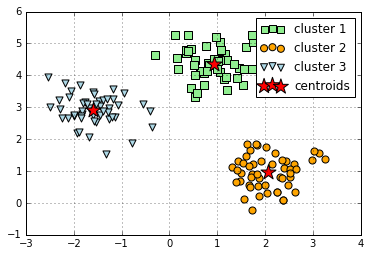

In [4]:
#Para usar k-means++, no poner init='random'

#Plot...
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [5]:
#Hard vs Soft clustering (p.ej.: Fuzzy C-means (FCM))

In [6]:
#Using the elbow method to find the optimal number of clusters

In [7]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


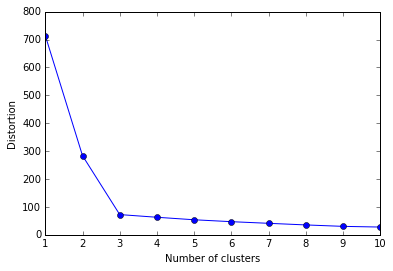

In [8]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [9]:
#Tomaría k=3...

In [10]:
#Quantifying the quality of clustering via silhouette plots

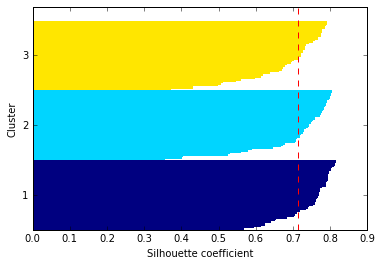

In [11]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)


import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

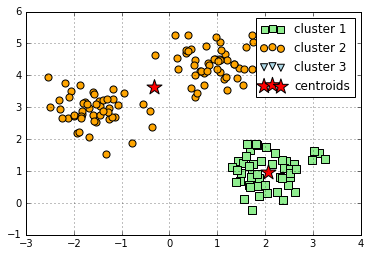

In [12]:
#Ahora la idea es mostrar las gráficas de coeficientes de silueta, para un caso malo (2 centroides, p. ej.)

km = KMeans(n_clusters = 2,
           init = 'random', #Esto no es muy bueno
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

#Plot...
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.legend()
plt.grid()
plt.show()

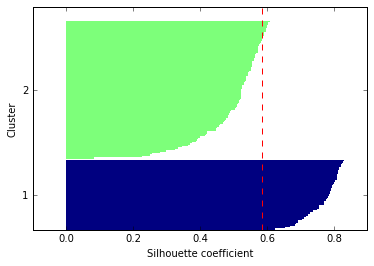

In [13]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [14]:
#Organizing clusters as a hierarchical tree: Agglomerative, and Divisive
#Agglomerative -> single linkage, complete linkage, average linkage, Ward's linkage

In [15]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*100
df = pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,69.646919,28.613933,22.685145
ID_1,55.131477,71.946897,42.310646
ID_2,98.076420,68.482974,48.093190
ID_3,39.211752,34.317802,72.904971
ID_4,43.857224,5.967790,39.804426


In [16]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,49.735340,55.166527,58.998850,38.353956
ID_1,49.735340,0.000000,43.470734,51.043111,66.982330
ID_2,55.166527,43.470734,0.000000,72.442616,83.165937
ID_3,58.998850,51.043111,72.442616,0.000000,43.828640
ID_4,38.353956,66.982330,83.165937,43.828640,0.000000


In [17]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering on the condensed
    distance matrix y.
    
    y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    An :math:`(n-1)` by 4  matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
    observations in the newly formed cluster.
    
    The following linkage methods are used to compute the distance
  

In [18]:
# ¡¡¡ Incorrecto !!!!  (No hay que pasar una matriz cuadrada de distancias; 
#se puede pasar triangular superior o los datos directamente)
row_clusters = linkage(row_dist,method='complete',metric='euclidean')

In [20]:
# Correcto 1: Pasar matriz triangular superior que devuelve pdist
row_clusters = linkage(pdist(df,metric='euclidean'),method='complete',metric='euclidean')

In [21]:
# Correcto 2: Pasar los datos directamente, y dejar que linkage calcule las distancias
row_clusters = linkage(df.values,metric='euclidean',method='complete')

In [23]:
#Pongo los resultados en un DataFrame
pd.DataFrame(row_clusters,
            columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,38.353956,2.0
cluster 2,1.0,2.0,43.470734,2.0
cluster 3,3.0,5.0,58.998850,3.0
cluster 4,6.0,7.0,83.165937,5.0


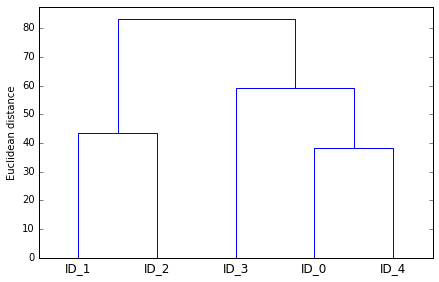

In [51]:
#Define nuevas etiquetas cuando arma un clúster (label=5 sería el clúster {0, 4}, label=6 el {1, 2}, label=7 el {3,5})
#Ahora lo muestro como un dendograma
from scipy.cluster.hierarchy import dendrogram
#Para mostrar el dendograma en negro, descomentar las lineas de abajo
from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['black'])
#set_link_color_palette(['orange','blue','green','red','yellow'])
row_dendr = dendrogram(row_clusters,labels=labels,color_threshold=0#color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

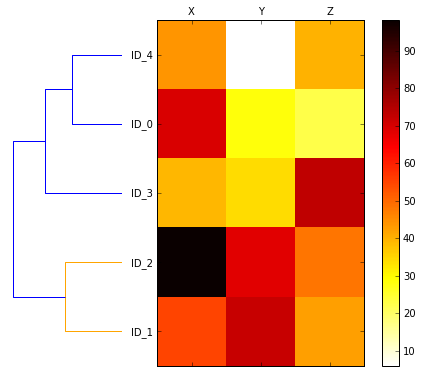

In [54]:
fig = plt.figure(figsize=(8,8),facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters,orientation='left')

#Reordenar los datos de acuerdo con los lugares donde aparecen en el dendrograma
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

#Construir el "heatmap"
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,interpolation='nearest',cmap='hot_r')

#Cambios "estéticos"
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))

plt.show()

In [ ]:
#Applying agglomerative clustering via scikit-learn

In [60]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)

Cluster labels: [0 1 1 0 0]


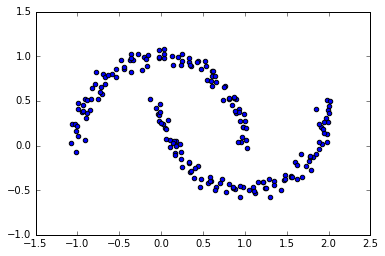

In [61]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

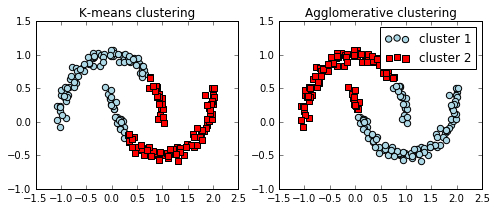

In [62]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

#k-means
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',marker='s',s=40,label='cluster 2')
ax1.set_title('K-means clustering')

#linkage
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()

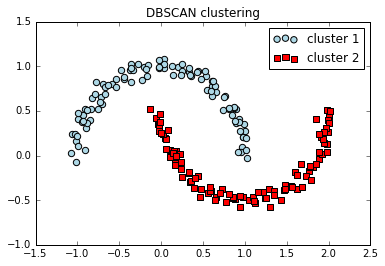

In [64]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0],X[y_db==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='red',marker='s',s=40,label='cluster 2')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

In [ ]:
#Algoritmos más avanzados: "graph based algorithms": p.ej.: "Spectral Clustering Algorithms"